# CCR - Cal Class Recommender

> Chaya Bakshi, Kalina Huynh

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## The Data:

In [2]:
df = pd.read_csv("appendix.csv").reset_index()
df.rename(columns = {'Course Title': 'title'}, inplace=True)
df.loc[:, ['Course Number', 'title','Instructors', 'Course Subject', 'Year', '% Audited', 'Median Age', '% Male', '% Female', "% Bachelor's Degree or Higher"]].head()

,Course Number,title,Instructors,Course Subject,Year,% Audited,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,6.002x,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,15.04,26.0,88.28,11.72,60.68
1,6.00x,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,14.27,28.0,83.50,16.50,63.04
2,3.091x,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,17.13,27.0,70.32,29.68,58.76
3,CS50x,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,9.96,28.0,80.02,19.98,58.78
4,PH207x,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,20.44,32.0,56.78,43.22,88.33


## What are the most frequent words in course titles?

In [3]:
import nltk
from nltk.corpus import stopwords
stops = stopwords.words('english')
stopdict = {i:i for i in stops}

In [4]:
bow = {}
df['title'] = df['title'].str.lower()
for i in df['title']:
    words = i.split()
    for word in words:
        if word not in stopdict:
            if word not in bow:
                bow[word] = 1
            else:
                bow[word]+= 1
bow

{'circuits': 12,
 'electronics': 5,
 'introduction': 53,
 'computer': 16,
 'science': 31,
 'programming': 11,
 'solid': 7,
 'state': 8,
 'chemistry': 7,
 'health': 10,
 'numbers:': 1,
 'quantitative': 4,
 'methods': 1,
 'clinical': 2,
 'public': 2,
 'research': 2,
 'challenges': 6,
 'global': 17,
 'poverty': 4,
 'electricity': 1,
 'magnetism': 1,
 'justice': 3,
 'biology:': 9,
 'secret': 4,
 'life': 8,
 'ancient': 7,
 'greek': 7,
 'hero': 8,
 'elements': 4,
 'structures': 3,
 'human': 2,
 'environmental': 2,
 'change': 3,
 'mechanics': 8,
 'review': 2,
 'classical': 4,
 'innovation': 2,
 'commercialization': 2,
 'architecture': 4,
 'central': 2,
 'american': 5,
 'national': 5,
 'security,': 2,
 'strategy': 2,
 'press:': 1,
 'philosophy:': 3,
 'god,': 2,
 'knowledge': 2,
 'consciousness': 2,
 'cooking:': 2,
 'haute': 2,
 'cuisine': 2,
 'soft': 2,
 'matter': 2,
 'fundamentals': 4,
 'trials': 1,
 'dynamics': 2,
 'control': 4,
 'political': 2,
 'intellectual': 2,
 'foundations': 2,
 'china

In [5]:
df_freq = pd.DataFrame.from_dict(bow, orient='index').reset_index()
df_freq.columns = ['word','count']
df_freq = df_freq.sort_values("count",ascending = False)
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq

,word,count
2,introduction,53
4,science,31
99,data,25
114,analysis,20
17,global,17
...,...,...
420,--,1
443,coherence,1
491,understanding,1
490,mattered,1


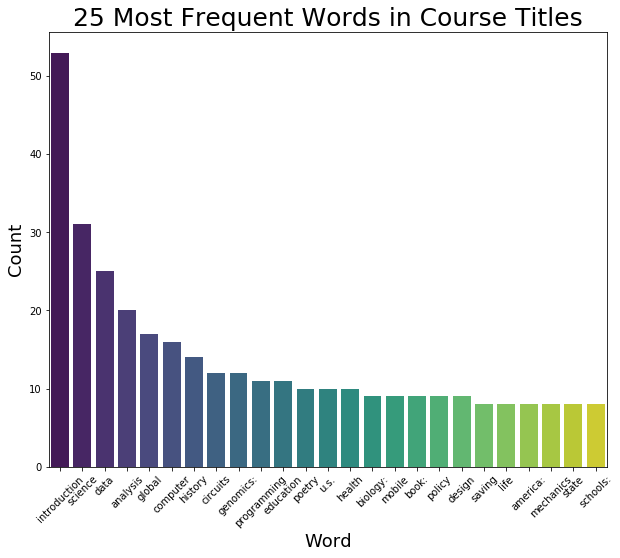

In [30]:
sml_freq = df_freq.head(25)
plt.figure(figsize=[10,8])
sns.barplot(x='word', y='count', data=sml_freq, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title("25 Most Frequent Words in Course Titles", fontsize=25);
plt.savefig('freq_25.png', bbox_inches='tight');

## Demo

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Example 2 classes to check their similarity
text = df['title'][:2]
text

0                            circuits and electronics
1    introduction to computer science and programming
Name: title, dtype: object

In [8]:
# One-Hot Encoding
count_matrix = cv.fit_transform(text)

print("Words:\n", cv.get_feature_names())
print("Word Presence:\n", count_matrix.toarray())

Words:
 ['and', 'circuits', 'computer', 'electronics', 'introduction', 'programming', 'science', 'to']
Word Presence:
 [[1 1 0 1 0 0 0 0]
 [1 0 1 0 1 1 1 1]]


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Finding the distance between the two points AKA similarity
similarity_scores = cosine_similarity(count_matrix)
print("Similarity Score:\t", similarity_scores[0][1])

Similarity Score:	 0.2357022603955159


In [10]:
# Sample of available classes in dataset
course_titles = df['title']
course_titles.head(10)

0                             circuits and electronics
1     introduction to computer science and programming
2                introduction to solid state chemistry
3                     introduction to computer science
4    health in numbers: quantitative methods in cli...
5     introduction to computer science and programming
6                introduction to solid state chemistry
7                     the challenges of global poverty
8                            electricity and magnetism
9                                              justice
Name: title, dtype: object

In [11]:
# Transforming the features
df['Participants (Course Content Accessed)'] = str(df['Participants (Course Content Accessed)'])
df['% Certified of > 50% Course Content Accessed'] = str(df['% Certified of > 50% Course Content Accessed'])
df['% Played Video'] = str(df['% Played Video'])
df['Total Course Hours (Thousands)'] = str(df['Total Course Hours (Thousands)'])

In [12]:
# Feature Selection
features = ['Institution', 'Instructors', 'Participants (Course Content Accessed)',
           '% Certified of > 50% Course Content Accessed', '% Played Video',
            'Total Course Hours (Thousands)']
features

['Institution',
 'Instructors',
 'Participants (Course Content Accessed)',
 '% Certified of > 50% Course Content Accessed',
 '% Played Video',
 'Total Course Hours (Thousands)']

In [13]:
# Function for combining the feature values into one string
def combine_features(row):
    return row['Institution'] + ' ' + row['Instructors'] + ' ' + row['Participants (Course Content Accessed)'] + ' ' + row['% Certified of > 50% Course Content Accessed'] + ' ' + row['% Played Video'] + ' ' + row['Total Course Hours (Thousands)']

In [14]:
# Data Cleaning and Pre-Processing
for feature in features:
    df[feature] = df[feature].fillna('') 
df['combined_features'] = df.apply(combine_features,axis=1)  

In [15]:
# Using new features
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features']) 
cosine_sim = cosine_similarity(count_matrix)

In [16]:
# Helper Functions
def get_title_from_index(index):
    return df[df['index'] == index]['title'].values[0]
def get_index_from_title(title):
    return df[df['title'] == title]['index'].values[0]
def get_cID_from_idx(index):
    return df.loc[index, 'Course Number']

## Example:

In [17]:
class_user_likes = course_titles[1]
class_index = get_index_from_title(class_user_likes)
class_cID = get_cID_from_idx(class_index)

print("Class Enjoyed by User:\n")
print("\t\tTitle:", class_user_likes, "\tId:", class_cID)

Class Enjoyed by User:

		Title: introduction to computer science and programming 	Id: 6.00x


In [18]:
# Finding Similar Classes
similar_classes =  list(enumerate(cosine_sim[class_index]))
sorted_similar_classes = sorted(similar_classes,key=lambda x:x[1],reverse=True)[1:]

i=0
used_cIDs = []

print("Top 5 similar classes to "+class_user_likes+" are:\n")
for element in sorted_similar_classes:
    if get_cID_from_idx(element[0]) != class_cID:
        if get_cID_from_idx(element[0]) not in used_cIDs:
            print("Title:", get_title_from_index(element[0]))
            print("Course Id:", get_cID_from_idx(element[0]))
            print("Similarity Score:", np.round(element[1], 4), "\n")
            used_cIDs.append(get_cID_from_idx(element[0]))
            i=i+1
            if i>=5:
                break

Top 5 similar classes to introduction to computer science and programming are:

Title: introduction to computer science and programming
Course Id: 6.00.1x
Similarity Score: 0.9961 

Title: introduction to computational thinking and data science
Course Id: 6.00.2x
Similarity Score: 0.9961 

Title: introduction to biology: secret of life
Course Id: 7.00x
Similarity Score: 0.9883 

Title: introduction to probability: the science of uncertainty
Course Id: 6.041x
Similarity Score: 0.9883 

Title: supply chain and logistics fundamentals
Course Id: ESD.SCM1x
Similarity Score: 0.9883 

